## Load and clean the data

In [4]:
# In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from
# https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
# In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

# Data preparation
# Check if the missing values are presented in the features.
# If there are missing values:
# For caterogiral features, replace them with 'NA'
# For numerical features, replace with with 0.0
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
# Use train_test_split function for that with random_state=1

# run once to refresh the dataset csv file -
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
numerical 

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [7]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [8]:
# how many missing values in our dataframe per column
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
# If there are missing values:
# -- For categorical features, replace them with 'NA'

df[categorical] = df[categorical].fillna('NA') # to fill NaN in-place
for col in df[categorical]:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)

lead_source:
['paid_ads' 'social_media' 'events' 'referral' 'organic_search' 'NA']
----------------------------------------
industry:
['NA' 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
----------------------------------------
employment_status:
['unemployed' 'employed' 'NA' 'self_employed' 'student']
----------------------------------------
location:
['south_america' 'australia' 'europe' 'africa' 'middle_east' 'NA'
 'north_america' 'asia']
----------------------------------------


In [10]:
# If there are missing values:
# -- For numerical features, replace with with 0.0

df[numerical] = df[numerical].fillna(0.0) # to fill NaN in-place
# CHECK - how many missing values in our dataframe per column NOW:
df.isna().sum() # all good!

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
# Use train_test_split function for that with random_state=1

from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
# lets check how SKL split our dataset
len(df_train), len(df_val), len(df_test) # (876, 293, 293)

(876, 293, 293)

In [20]:
# Shall we delete label here ot later? And reshuggle datasets + reset indices? Probably yes...

# STEP 1 - reset index in each split for simplicity
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
# STEP 2 - remove label we predict - so our model will not accidentally look at it...
# Make sure that the target value converted is not in your dataframe.

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [22]:
# STEP 3 - check 
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
1,referral,NA,1,54924.0,student,south_america,6,0.39
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01


In [25]:
len(y_train), len(df_train) # (876, 876)

(876, 876)

## Question 1: ROC AUC feature importance

In [31]:
# Question 1: ROC AUC feature importance
# ROC AUC could also be used to evaluate feature importance of numerical variables.

# Let's do that

# For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
# Use the training dataset for that
# If your AUC is < 0.5, invert this variable by putting "-" in front

# (e.g. -df_train['balance'])

# AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

# Which numerical variable (among the following 4) has the highest AUC?

# lead_score
# number_of_courses_viewed --- number_of_courses_viewed 0.7635680590007088
# interaction_count
# annual_income

# There is a shortcut in scikit-learn package - to do auc score in 1 line 
from sklearn.metrics import roc_auc_score
 
# roc_auc_score(y_val, y_pred)
for f in numerical:
    score = roc_auc_score(y_train, df_train[f])
    print(f, score)

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


## Question 2: Training the model

In [32]:
# Question 2: Training the model
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# What's the AUC of this model on the validation dataset? (round to 3 digits)

# 0.32
# 0.52
# 0.72
# 0.92

from sklearn.feature_extraction import DictVectorizer

In [33]:
# fit and transform train and val datasets by 1-hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict) # WE USE ONLY TRANSFORM IN VAL DATASET - DO NOT FIT THERE!!!
# fit_transform is the same as dv.fit and dv.transform

In [34]:
# CHECK 2
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [42]:
# train the logistic regression with these parameters:
# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

from sklearn.linear_model import LogisticRegression

# lets train it
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
# What's the AUC of this model on the validation dataset? (round to 3 digits)

# 0.32
# 0.52
# 0.72 -- closer to here - 0.65
# 0.92

y_pred = model.predict(X_val)
round(roc_auc_score(y_val, y_pred), 2)
 
# Output: 0.65

0.65

In [47]:
# double - checking myself
from sklearn.metrics import auc, roc_curve
# auc needs values for x-axis and y-axis
y_pred = model.predict_proba(X_val)[:, 1]
y_pred = (y_pred >= 0.6) # if we raise the threshold a bit for predictions we possibly get better result...

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.7213833764739719

## Question 3: Precision and Recall

In [54]:
# Question 3: Precision and Recall
# Now let's compute precision and recall for our model.

# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them
# At which threshold precision and recall curves intersect?

# 0.145
# 0.345
# 0.545
# 0.745
y_pred = model.predict_proba(X_val)[:, 1]
scores = []
thresholds = np.linspace(0, 1, 101) # similar to list(range(...

for t in thresholds:
    actual_positive = (y_val == 1) # leads converted
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, fp, fn, tn))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)


In [55]:
# add precision and recall columns:
# precision = tp / (tp + fp)  # true positives divided by all predicted positives
# recall = tp / (tp + fn) # how many leads our model predicted to convert out of all leads
 
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.fp / (df_scores.fp + df_scores.fn)
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,171,122,0,0,0.583618,1.000000
10,0.1,171,122,0,0,0.583618,1.000000
20,0.2,171,122,0,0,0.583618,1.000000
30,0.3,171,119,0,3,0.589655,1.000000
40,0.4,171,105,0,17,0.619565,1.000000
50,0.5,164,81,7,41,0.669388,0.920455
60,0.6,150,53,21,69,0.738916,0.716216
70,0.7,106,25,65,97,0.809160,0.277778
80,0.8,64,6,107,116,0.914286,0.053097
90,0.9,24,1,147,121,0.960000,0.006757


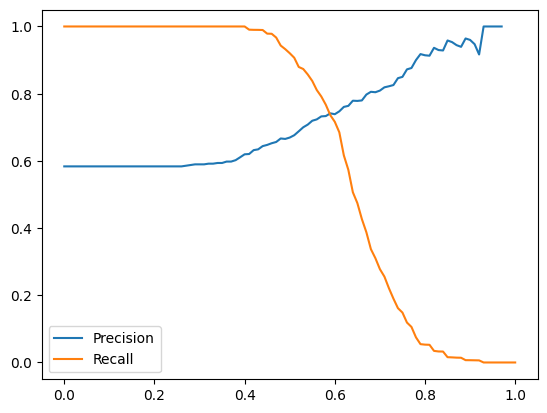

In [56]:
# and plotting part:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

In [ ]:
# At which threshold precision and recall curves intersect?

# 0.145
# 0.345
# 0.545 -- at about 0.6
# 0.745